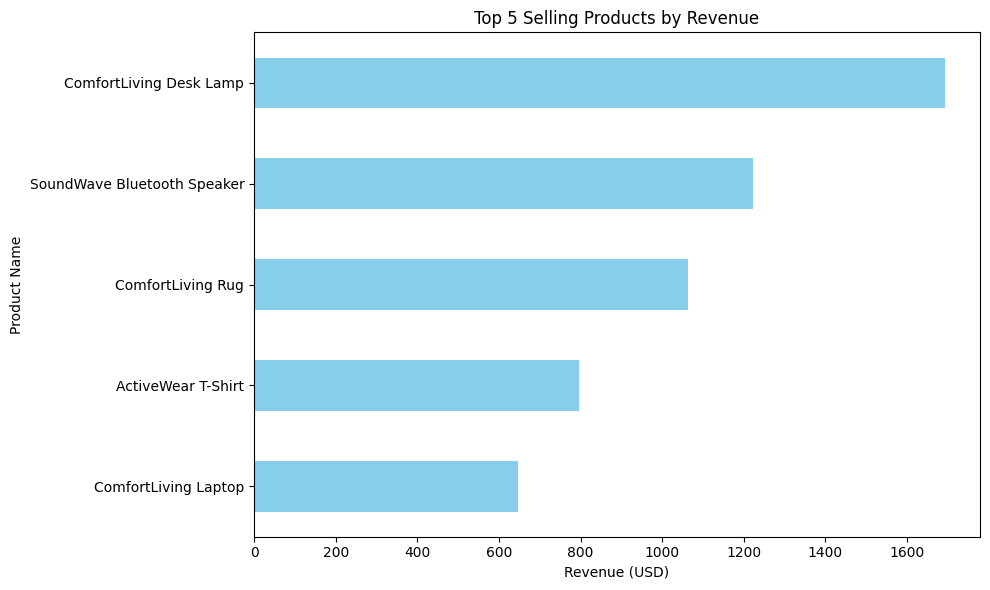

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge the dataframes on 'ProductID' and 'CustomerID'
merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='inner')

# Calculate total revenue for each product
revenue_per_product = merged_df.groupby('ProductName')['TotalValue'].sum()

# Sort the products by revenue in descending order and pick top 5
top_5_products = revenue_per_product.sort_values(ascending=True).head(5)

plt.figure(figsize=(10, 6))
top_5_products.plot(kind='barh', color='skyblue') 
plt.ylabel('Product Name')
plt.xlabel('Revenue (USD)')
plt.title('Top 5 Selling Products by Revenue')
plt.tight_layout()
plt.show()


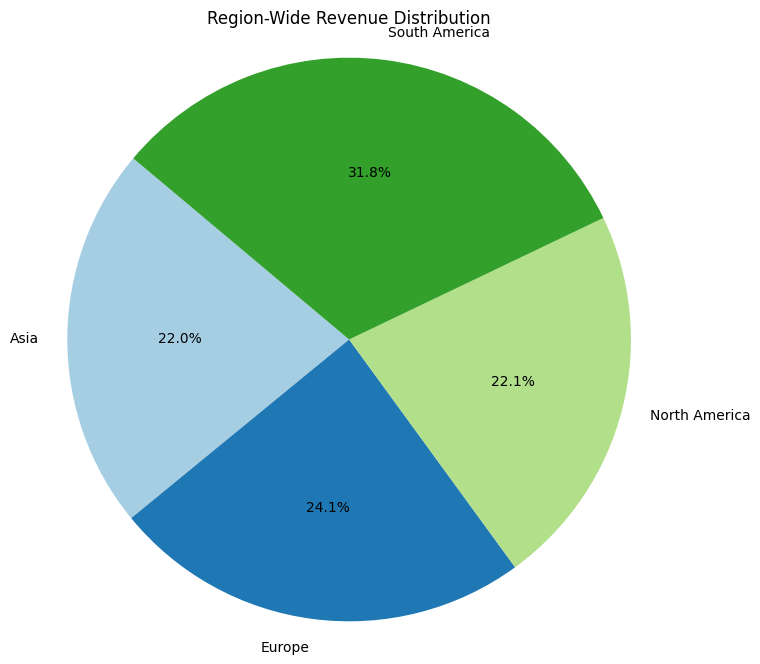

In [74]:


merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')

# Calculate the total revenue per region
revenue_per_region = merged_df.groupby('Region')['TotalValue'].sum()

plt.figure(figsize=(8, 8))
plt.pie(revenue_per_region, labels=revenue_per_region.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Region-Wide Revenue Distribution')
plt.axis('equal') 


<Figure size 1200x700 with 0 Axes>

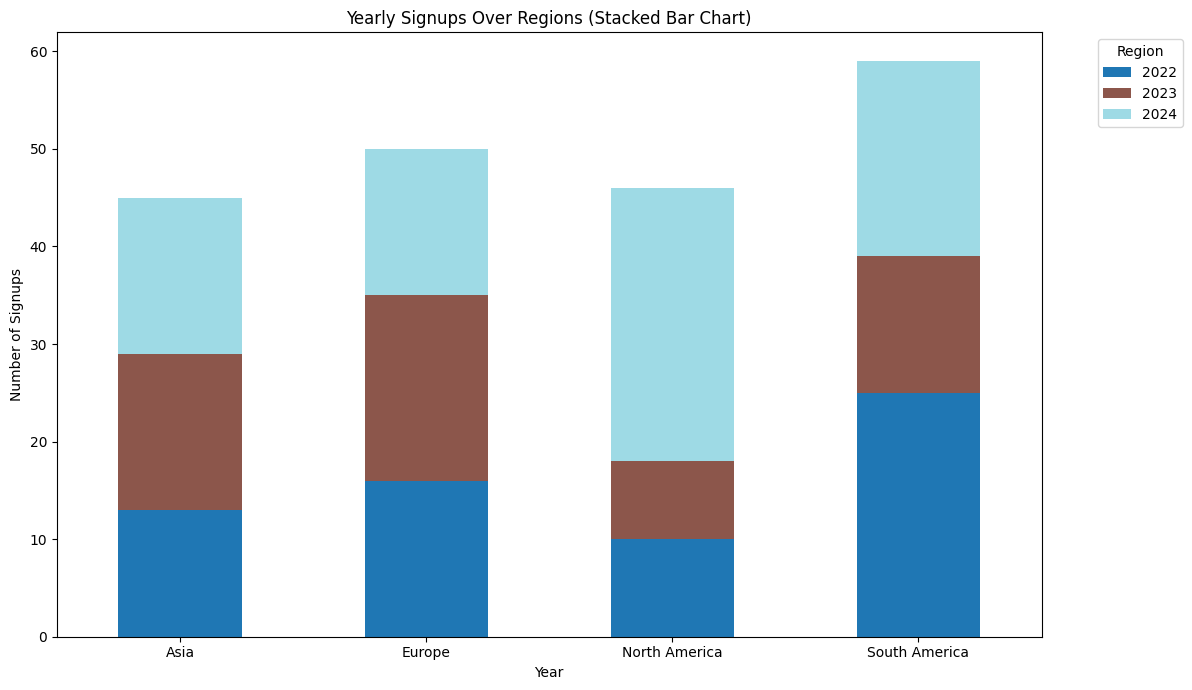

In [75]:

customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year

signup_per_region_year = customers_df.groupby(['Region', 'SignupYear']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 7))
signup_per_region_year.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 7))

plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.title('Yearly Signups Over Regions (Stacked Bar Chart)')
plt.xticks(rotation=0)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


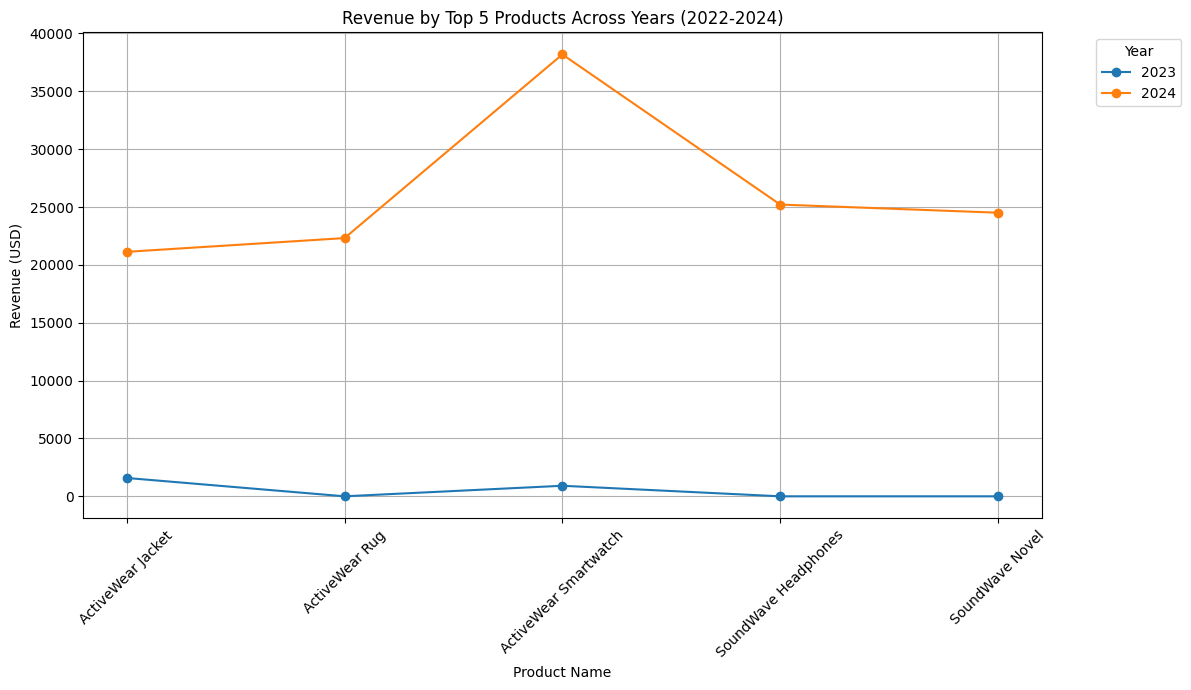

In [76]:

merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='inner')

merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Year'] = merged_df['TransactionDate'].dt.year

merged_df = merged_df[merged_df['Year'].isin([2022, 2023, 2024])]

# Calculate total revenue per product across all years
total_revenue_per_product = merged_df.groupby('ProductName')['TotalValue'].sum()

# Get the top 5 products by total revenue
top_5_products = total_revenue_per_product.nlargest(5).index

# Calculate total revenue per year for the top 5 products
revenue_per_year_category = merged_df[merged_df['ProductName'].isin(top_5_products)].groupby(['Year', 'ProductName'])['TotalValue'].sum().unstack(fill_value=0)

# Plotting the revenue for each year across top 5 products
plt.figure(figsize=(12, 7))
for year in revenue_per_year_category.index:
    plt.plot(revenue_per_year_category.columns, revenue_per_year_category.loc[year], marker='o', label=str(year))

plt.xlabel('Product Name')
plt.ylabel('Revenue (USD)')
plt.title('Revenue by Top 5 Products Across Years (2023-2024)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


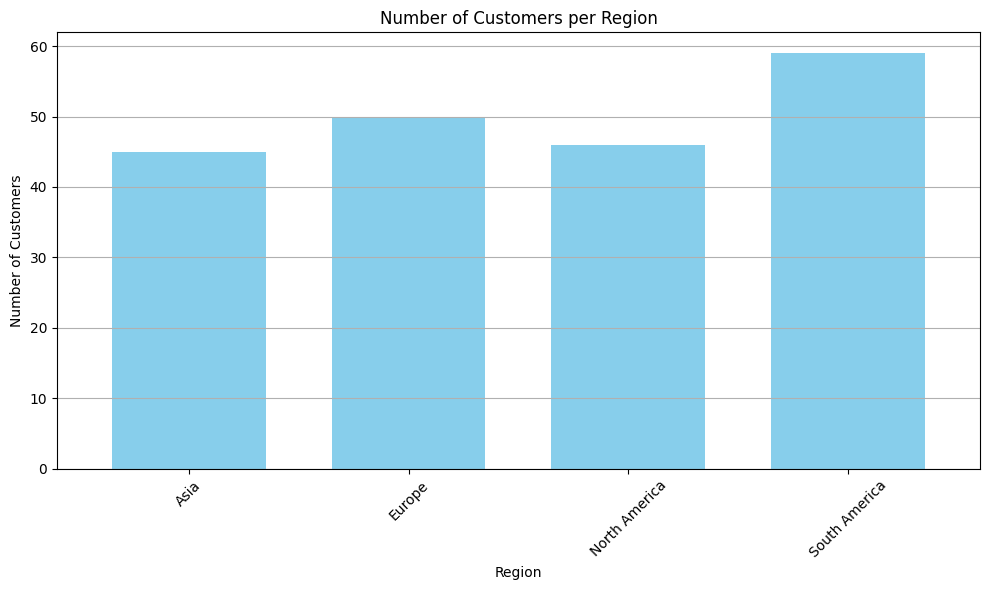

In [77]:


customer_count_per_region = customers_df.groupby('Region')['CustomerID'].nunique()

plt.figure(figsize=(10, 6))
customer_count_per_region.plot(kind='bar', color='skyblue', width=0.7)

plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


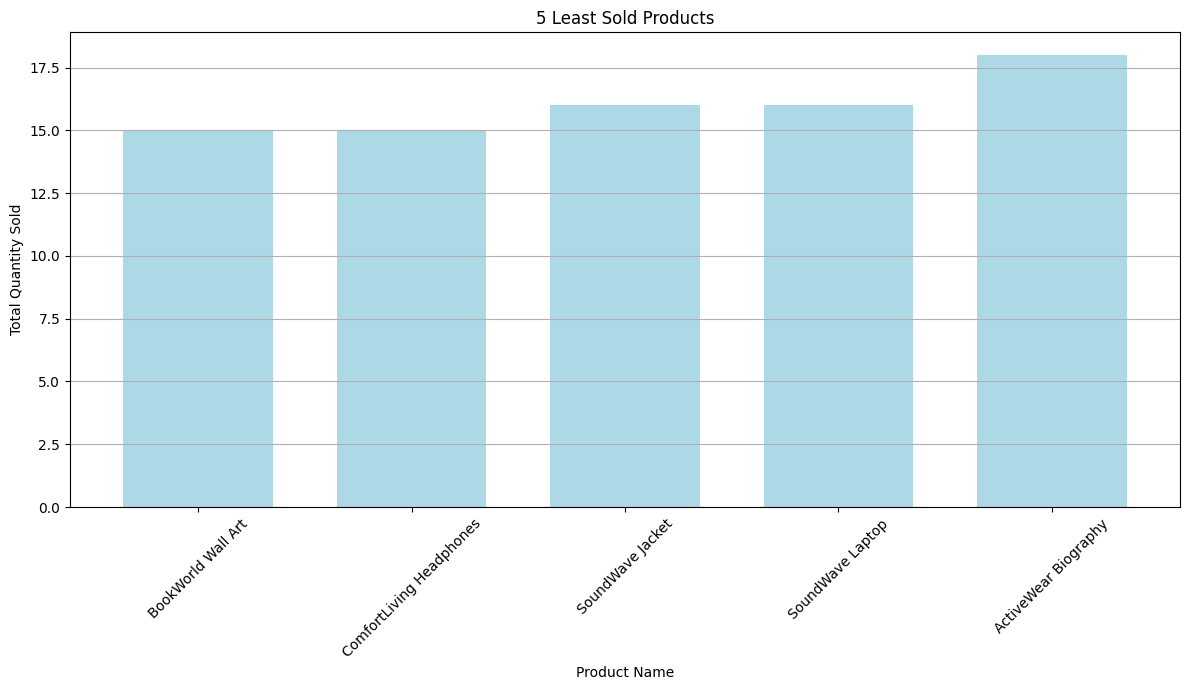

In [78]:


merged_df = pd.merge(transactions_df, products_df, on='ProductID', how='inner')

quantity_per_product = merged_df.groupby('ProductName')['Quantity'].sum()

least_sold_products = quantity_per_product.nsmallest(5)

plt.figure(figsize=(12, 7))
least_sold_products.plot(kind='bar', color='lightblue', width=0.7)

plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.title('5 Least Sold Products')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
